In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import pandas_bokeh
pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')
# Create Bokeh-Table with DataFrame:
from bokeh.models.widgets import DataTable, TableColumn
from bokeh.models import ColumnDataSource



# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)

# matplotlib
import matplotlib.pyplot as plt
# import graph objects as "go"
import plotly.graph_objs as go

Loading BokehJS ...

In [ ]:
!pip install plotly ### Install this librabry for data analysis and plotting

In [ ]:
!pip install pandas-bokeh ### Install this librabry for data analysis and plotting

# Manual_vaccine_progress investigation

In [2]:
df = pd.read_csv('Manual-Vaccine-Progress.csv')
df = df.sort_values(by="Date")
df = df.dropna()
df.head()

,Country,Date,One-dose,Total-Vaccinated,source
2,BHR,16.03.21,361241.0,219298.0,https://healthalert.gov.bh/en/category/daily-c...
3,BHR,24.03.21,452551.0,242128.0,https://healthalert.gov.bh/en/category/daily-c...
6,IRQ,16.03.21,16872.0,700.0,https://app.powerbi.com/view?r=eyJrIjoiYTU2NTB...
7,IRQ,17.03.21,16943.0,700.0,https://app.powerbi.com/view?r=eyJrIjoiYTU2NTB...
8,IRQ,18.03.21,17064.0,700.0,https://app.powerbi.com/view?r=eyJrIjoiYTU2NTB...


Text(0.5, 1.0, 'One-dose Given Menar Countries')

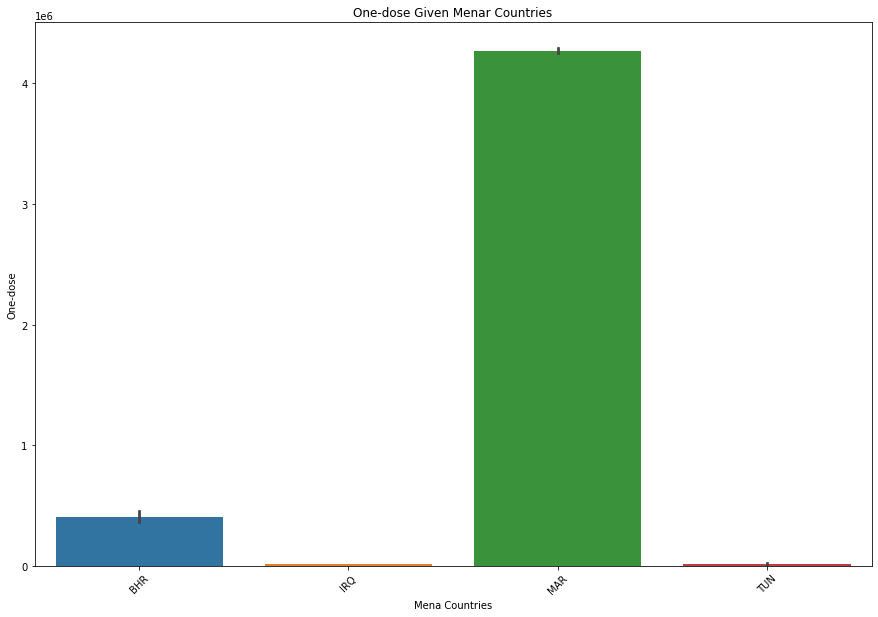

In [3]:

## Visualisation One-Dose per Country
plt.figure(figsize=(15,10))
sns.barplot(x=df['Country'], y=df['One-dose'])
plt.xticks(rotation= 45)
plt.xlabel('Mena Countries')
plt.ylabel('One-dose')
plt.title('One-dose Given Menar Countries')


# OWID data investigation - vaccination progress

In [5]:
df_owid = pd.read_csv('OWID-Vaccine-Progress.csv')
df_owid = df_owid.drop(["Unnamed: 0"], axis = 1)
df_owid = df_owid.sort_values(by="Date")
df_owid.head()

,Country,Date,Total_Vaccinations,Source_url
231,ISR,2020-12-19,61.0,https://datadashboard.health.gov.il/COVID-19/g...
232,ISR,2020-12-20,7434.0,https://datadashboard.health.gov.il/COVID-19/g...
233,ISR,2020-12-21,32311.0,https://datadashboard.health.gov.il/COVID-19/g...
582,QAT,2020-12-22,0.0,https://www.aljazeera.com/news/2020/12/23/qata...
234,ISR,2020-12-22,76928.0,https://datadashboard.health.gov.il/COVID-19/g...


# Choose the country

In [6]:
string = input('Write three capital letters for your country : ')

Write three capital letters for your country : ARE


In [7]:
df_1 = df_owid[df_owid['Country'] == str(string)]#  covid spread data for a chosen country

In [8]:
df_1.head()

,Country,Date,Total_Vaccinations,Source_url
0,ARE,2021-01-05,826301.0,https://fcsc.gov.ae/en-us/Pages/Covid19/UAE-Co...
1,ARE,2021-01-06,826301.0,https://fcsc.gov.ae/en-us/Pages/Covid19/UAE-Co...
2,ARE,2021-01-07,887697.0,https://fcsc.gov.ae/en-us/Pages/Covid19/UAE-Co...
3,ARE,2021-01-08,941556.0,https://fcsc.gov.ae/en-us/Pages/Covid19/UAE-Co...
4,ARE,2021-01-09,1020349.0,https://fcsc.gov.ae/en-us/Pages/Covid19/UAE-Co...


In [80]:
# line plot
trace1 = go.Scatter(
    x=df_1.Date,
    y=df_1['Total_Vaccinations'],
    name = "Total_Vaccinations",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)


data = [trace1]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    
    ),
    title = 'Total-Vaccinated in '+str(string)

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [9]:
vaccination_total = df_1.groupby(['Date'])['Total_Vaccinations'].sum()
vaccination_total= vaccination_total.reset_index().sort_values('Date')
vaccination_total.head()

,Date,Total_Vaccinations
0,2021-01-05,826301.0
1,2021-01-06,826301.0
2,2021-01-07,887697.0
3,2021-01-08,941556.0
4,2021-01-09,1020349.0


In [33]:
import plotly.graph_objects as go

x=[i.split('-')[1]+'-'+i.split('-')[0] for i in vaccination_total.Date ]
fig = go.Figure()
fig.update_layout(template='plotly_dark')
fig.add_trace(go.Scatter(x=x, 
                         y=vaccination_total['Total_Vaccinations'],
                         mode='lines+markers',
                         name='total_cases',
                         line=dict(color='rgb(102, 102, 255)', width=2)))

fig.update_layout(
    title = 'Vaccination progress in '+str(string),
    xaxis_tickformat = '%d %B (%a)<br>%Y'
)
fig.show()

# Total-vaccine-Progress dataset investigation

In [67]:
#df_total_vaccine = pd.read_csv('Total-Vaccine-Progress.csv')
#df_total_vaccine = df_total_vaccine.drop(["Unnamed: 0"], axis = 1)
#df_total_vaccine["date"] = pd.to_datetime(df_total_vaccine["date"])
#df_total_vaccine = df_total_vaccine.sort_values(by="date")

In [68]:
#df_new_total_vaccine = df_total_vaccine[df_total_vaccine['country'] == str(string)]

In [69]:
#total_vaccination_progress = df_new_total_vaccine .groupby(['date'])['total_vaccinations'].sum()
#total_vaccination_progress= total_vaccination_progress.reset_index().sort_values('date')
#total_vaccination_progress.head()

,date,total_vaccinations
0,01.02.21,3440777
1,01.03.21,6028417
2,01.04.21,8391302
3,02.02.21,3564517
4,02.03.21,6094956


In [73]:
import plotly.graph_objects as go

x=[i.split('.')[1]+'.'+i.split('.')[0] for i in total_vaccination_progress.date ]
fig = go.Figure()
fig.update_layout(template='plotly_dark')
fig.add_trace(go.Scatter(x=x, 
                         y=total_vaccination_progress['total_vaccinations'],
                         mode='lines+markers',
                         name='total_cases',
                         line=dict(color='rgb(102, 102, 255)', width=2)))

fig.update_layout(
    title = 'Total_Vaccination progress in '+str(string),
    xaxis_tickformat = '%d %B (%a)<br>%Y'
)
fig.show()